In [120]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [121]:

# Function to plot beautiful Seaborn graphs with custom colors
def plot_graph(data, x, y, title, xlabel, ylabel, kind='bar', colors=None):
    # Custom colors
    colors = ['#3D3B40', '#525CEB', '#BFCFE7', '#11009E', '#FFE7C1', '#F3CCF3', '#E9A8F2', '#DC84F3']
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    if kind == 'bar':
        sns.barplot(x=x, y=y, data=data, palette=colors)
    elif kind == 'line':
        sns.lineplot(x=x, y=y, data=data,color=random.choice(colors))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()


# Connect to DB

In [122]:
# Connect to MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="data_scientist_project"
)

# Define functions for executing SQL queries and fetching data
def execute_query(query):
    cursor = db_connection.cursor()
    cursor.execute(query)
    return cursor.fetchall()

def fetch_dataframe(query):
    cursor = db_connection.cursor()
    cursor.execute(query)
    columns = [desc[0] for desc in cursor.description]
    return pd.DataFrame(cursor.fetchall(), columns=columns)




# Question 1: Which courses are the most watched by students, and how are they rated?

In [123]:

query1 = """
SELECT sw.Course_Id, COUNT(sw.Student_Id) AS Watch_Count, AVG(sw.Seconds_Watched) AS Avg_Seconds_Watched
FROM student_video_watched sw
GROUP BY sw.Course_Id
ORDER BY Watch_Count DESC
LIMIT 10;
"""
df1 = fetch_dataframe(query1)
print("Top 10 most watched courses:")
df1.head(10)



Top 10 most watched courses:


,Course_Id,Watch_Count,Avg_Seconds_Watched
0,7,13250,991.7157
1,14,8108,1674.1448
2,23,7248,1428.2442
3,21,6854,1314.0896
4,42,6138,1988.8669
5,16,5471,1743.3807
6,28,2950,1652.0044
7,37,2612,1372.4001
8,24,2467,1556.4641
9,35,2442,1198.6613


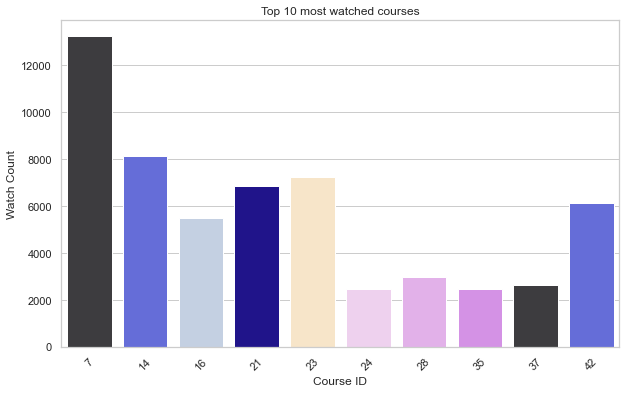

In [124]:
plot_graph(df1, 'Course_Id', 'Watch_Count', 'Top 10 most watched courses', 'Course ID', 'Watch Count', kind='bar')


# Question 2: How many students register each month, and what fraction are onboarded?

In [125]:

query2 = """
SELECT MONTH(Date_registered) AS Month, COUNT(*) AS Total_Registered,
       SUM(IF(spi.Date_Refunded IS NULL, 1, 0)) AS Onboarded
FROM student_info si
LEFT JOIN 
	student_purchases spi ON si.Student_Id = spi.Student_Id
GROUP BY Month;
"""
df2 = fetch_dataframe(query2)
df2['Fraction_Onboarded'] = df2['Onboarded'] / df2['Total_Registered']
print("\nMonthly registration and onboarding statistics:")
df2.head(10)




Monthly registration and onboarding statistics:


,Month,Total_Registered,Onboarded,Fraction_Onboarded
0,12,6674,6624,0.9925082409349715313155528918
1,8,7784,7764,0.9974306269270298047276464543
2,7,5989,5955,0.9943229253631658039739522458
3,1,6246,6164,0.9868715978226064681396093500
4,3,29126,29063,0.9978369841378836778136373000
5,4,99095,98968,0.9987184015338816287400978859
6,9,7317,7288,0.9960366270329369960366270329
7,11,24712,24640,0.9970864357397215927484622855
8,10,63543,63497,0.9992760807642069150024392931
9,6,9646,9600,0.9952311839104291934480613726


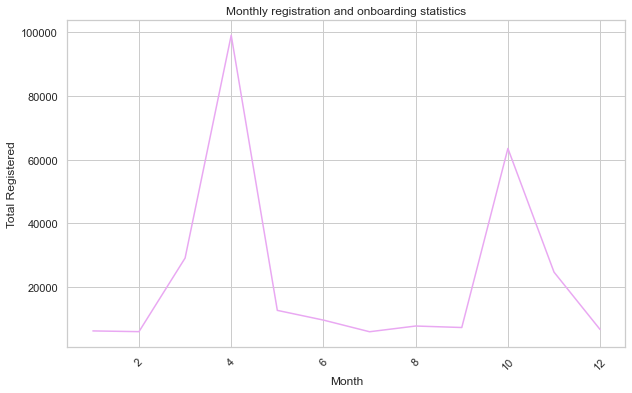

In [126]:
plot_graph(df2, 'Month', 'Total_Registered', 'Monthly registration and onboarding statistics', 'Month', 'Total Registered', kind='line')


# Question 3: How do students engage with the platform based on student type?

In [127]:

query3 = """
SELECT sp.Plan_Id, AVG(svw.Seconds_Watched) AS Avg_Seconds_Watched
FROM student_video_watched svw
JOIN student_info si ON svw.Student_Id = si.Student_Id
JOIN student_purchases sp ON si.Student_Id = sp.Student_Id
GROUP BY sp.Plan_Id;
"""
df3 = fetch_dataframe(query3)
print("\nEngagement with the platform based on student type:")
df3.head(10)



Engagement with the platform based on student type:


,Plan_Id,Avg_Seconds_Watched
0,0,1674.8472
1,2,1664.9355
2,3,1927.8466
3,1,1699.6147


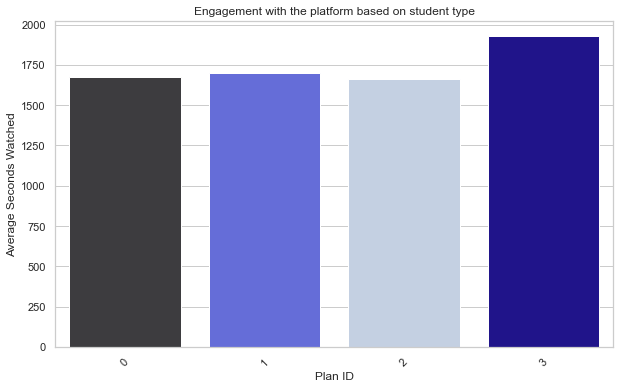

In [128]:
plot_graph(df3, 'Plan_Id', 'Avg_Seconds_Watched', 'Engagement with the platform based on student type', 'Plan ID', 'Average Seconds Watched', kind='bar')



# Question 4: Do students watch more content with time, and does it vary seasonally?

In [129]:

query4 = """
SELECT YEAR(sw.Date_Watched) AS Year, MONTH(sw.Date_Watched) AS Month,
       AVG(sw.Seconds_Watched) AS Avg_Seconds_Watched
FROM student_video_watched sw
GROUP BY Year, Month;
"""
df4 = fetch_dataframe(query4)
print("\nAverage minutes watched per month:")
df4.head(10)



Average minutes watched per month:


,Year,Month,Avg_Seconds_Watched
0,2021,4,1304.6825
1,2021,6,1646.2347
2,2021,5,1467.7972
3,2022,4,1525.7517
4,2022,6,1393.0573
5,2022,5,1413.4962


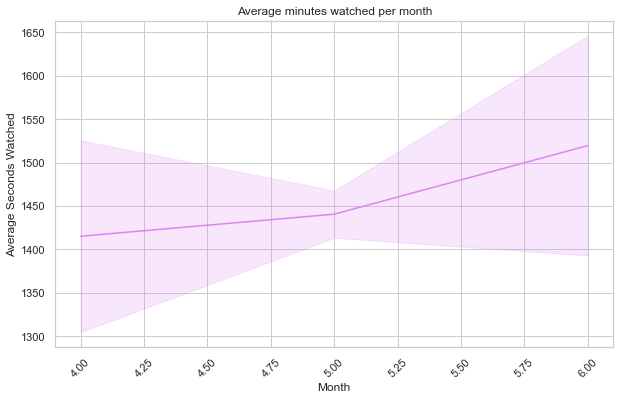

In [130]:
plot_graph(df4, 'Month', 'Avg_Seconds_Watched', 'Average minutes watched per month', 'Month', 'Average Seconds Watched', kind='line')


In [131]:
colors=['#3D3B40','#525CEB','#BFCFE7','#F8EDFF'
        '#FFE7C1','#F3CCF3','#E9A8F2','#DC84F3']

In [133]:

# # Close the database connection
db_connection.close()